In [9]:
import sys
#sys.path.insert(0, 'C:/Users/Can/Dropbox/PC (2)/Desktop/My Numerical Calculations/Single Particle/Hofstadter')
from Hard_Core_BC_Hofstadter_Hamiltonian_Matrix import *
from Periodic_BC_Hofstadter_Hamiltonian_Matrix import *
# from Hofstadter_Matrix_in_k_space import *

In [10]:
import numpy as np

In [23]:
L_x=L_y=100

In [24]:
#! Hofstadter_Matrix_in_k_space içindeki kodları buraya alınca sorunsuz çalışırken, kodları çağırdığımda hata veriyor !

import numpy as np

# Initial value of q
q=10

#Hamiltonian Matrix for Hofstadter Model (doesn't include alpha=1/2 matrix)
def HMatrix(alfa, k_x, k_y):
    M = np.zeros((q,q), dtype=complex) 
    for i in range (0, q):
        M[i,i]=2*np.cos(k_y-2*np.pi*alfa*i) 
        if i==q-1: 
            M[i,i-1]=1
        elif i==0: 
            M[i,i+1]=1
        else: 
            M[i,i-1]=1
            M[i,i+1]=1
        M[0,q-1]=np.exp(-q*1.j*k_x)
        M[q-1,0]=np.exp(q*1.j*k_x)
    return M

#Special Hofstadter Matrix Just alpha=1/2
s = 2
alpha = 1/s
def HMatrix2(alpha, k_x, k_y):
    M2 = np.zeros((s,s), dtype=complex) 
    for i in range (0, s):
        M2[i,i]=2*np.cos(k_y-2*np.pi*alpha*i) 
        if i==q-1: 
            M2[i,i-1]=1
        M2[0,s-1]=1+np.exp(-s*1.j*k_x)
        M2[s-1,0]=1+np.exp(s*1.j*k_x)
    return M2

#Set Rational to Alpha Values 
def gcd(a, b): 
    if b == 0: return a
    return gcd(b, a % b)

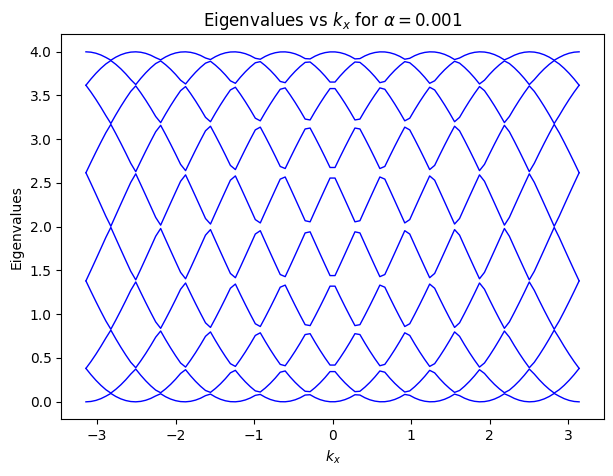

In [26]:
kx_values = np.linspace(-np.pi, np.pi, 100)
alfa = 0.001
eigenvalues_kx = []

for kx in kx_values:
    eigs = np.linalg.eigvalsh(HMatrix(alfa, kx, k_y=0))
    eigenvalues_kx.append(eigs)

eigenvalues_kx = np.array(eigenvalues_kx)

plt.figure(figsize=(7, 5))
for band in range(eigenvalues_kx.shape[1]):
    plt.plot(kx_values, eigenvalues_kx[:, band], 'b-', linewidth=1)
plt.xlabel(r'$k_x$')
plt.ylabel('Eigenvalues')
plt.title(r'Eigenvalues vs $k_x$ for $\alpha={}$'.format(alfa))
plt.show()

Calculating dispersion for a ribbon of width 100 and flux phi = 0.0001...
Calculation complete.


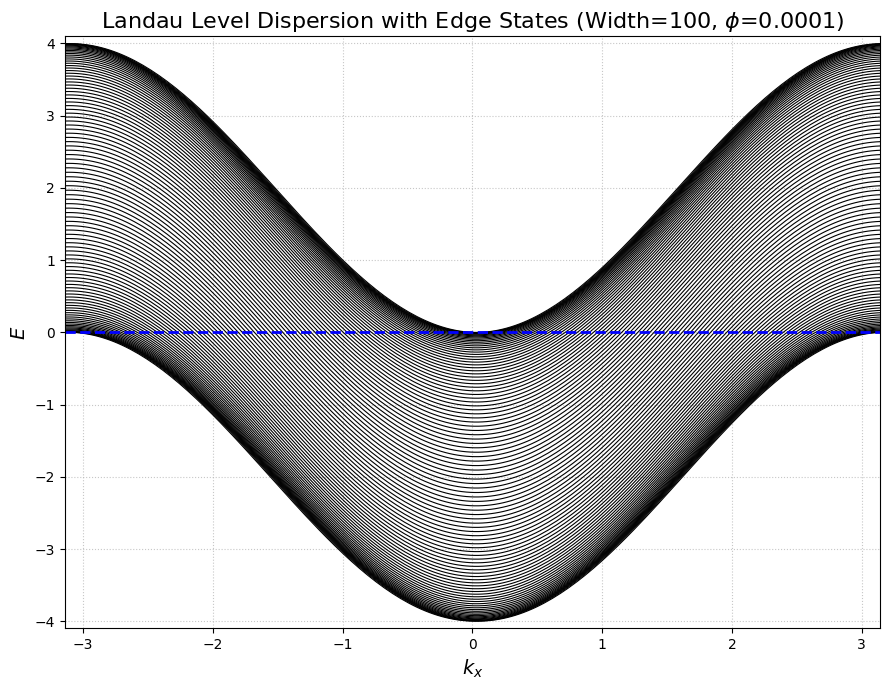

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def generate_landau_level_dispersion(width_ny, hopping_t, magnetic_flux_phi):
    """
    Generates the dispersion relation for Landau levels (including edge states)
    using a tight-binding model on a square lattice with a magnetic field.

    Args:
        width_ny (int): The width of the ribbon (number of sites in the y-direction).
                        This creates the finite dimension and allows for edge states.
        hopping_t (float): The hopping energy between adjacent sites.
                           This sets the energy scale.
        magnetic_flux_phi (float): Magnetic flux per unit cell in units of flux quantum (phi_0 = h/e).
                                   This is equivalent to B * a^2 / phi_0, where 'a' is the lattice constant.
                                   This parameter controls the strength of the magnetic field and thus
                                   the Landau level spacing and edge state dispersion.

    Returns:
        tuple: A tuple containing:
            - kx_values (numpy.ndarray): Array of kx values.
            - energies (numpy.ndarray): 2D array of energies for each kx and band.
    """

    # Discretize kx values
    num_kx_points = 200
    kx_values = np.linspace(-np.pi, np.pi, num_kx_points)

    energies = np.zeros((num_kx_points, width_ny))

    # We use the Landau gauge A = (-By, 0, 0) for a ribbon along x (finite in y).
    # This means:
    #   - Hopping along x from (x, y) to (x+1, y) gets a phase exp(-i * 2 * pi * phi * y)
    #   - Hopping along y from (x, y) to (x, y+1) has no magnetic phase (remains -hopping_t)

    for i_kx, kx in enumerate(kx_values):
        # Construct the Hamiltonian matrix for the current kx value
        # H is a (width_ny x width_ny) matrix
        H = np.zeros((width_ny, width_ny), dtype=complex)

        for y in range(width_ny):
            # On-site term from hopping in x-direction with kx and Peierls phase
            # This forms the diagonal elements in the y-basis
            H[y, y] = -2 * hopping_t * np.cos(kx - 2 * np.pi * magnetic_flux_phi * y)

            # Hopping in y-direction (off-diagonal elements)
            # No magnetic phase in this gauge for y-hopping
            if y > 0: # Hopping from (y) to (y-1)
                H[y, y-1] = -hopping_t
            if y < width_ny - 1: # Hopping from (y) to (y+1)
                H[y, y+1] = -hopping_t

        # Diagonalize the Hamiltonian to find energy eigenvalues
        # eigvalsh is for Hermitian matrices, faster and more stable than eigvals
        current_energies = np.linalg.eigvalsh(H)
        energies[i_kx, :] = np.sort(current_energies) # Store sorted energies

    return kx_values, energies

# --- Main execution block ---
if __name__ == "__main__":
    # --- Parameters for the simulation ---
    # These are the parameters you should adjust to explore different Landau Level scenarios.
    ribbon_width = 100  # Number of sites in the y-direction (width of the ribbon)
                       # Larger values give flatter bulk levels and clearer edge states.
    t = 1.0            # Hopping energy (sets the energy scale)
    phi = 0.0001         # Magnetic flux per unit cell (in units of h/e)
                       # Controls the magnetic field strength and Landau level spacing.
                       # Common values are small rationals like 1/5, 1/10, 1/20.

    # Generate the dispersion relation
    print(f"Calculating dispersion for a ribbon of width {ribbon_width} and flux phi = {phi}...")
    kx, E_bands = generate_landau_level_dispersion(ribbon_width, t, phi)
    print("Calculation complete.")

    # --- Plotting the dispersion relation ---
    plt.figure(figsize=(9, 7)) # Increased figure size for better clarity

    # Plot each band
    for i in range(E_bands.shape[1]): # Iterate through each band (column of E_bands)
        plt.plot(kx, E_bands[:, i], color='black', linewidth=0.8) # Adjusted linewidth for many bands

    # Add a dashed line at E=0 (often represents the Fermi level reference)
    plt.axhline(y=0, color='blue', linestyle='--', linewidth=2)

    plt.xlabel(r'$k_x$', fontsize=14)
    plt.ylabel(r'$E$', fontsize=14)
    plt.title(f'Landau Level Dispersion with Edge States (Width={ribbon_width}, $\phi$={phi})', fontsize=16)
    plt.xlim(-np.pi, np.pi)
    # Adjust y-limits dynamically based on calculated energies
    plt.ylim(np.min(E_bands) - 0.1 * t, np.max(E_bands) + 0.1 * t)
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.tight_layout() # Adjusts plot to prevent labels overlapping
    plt.show()

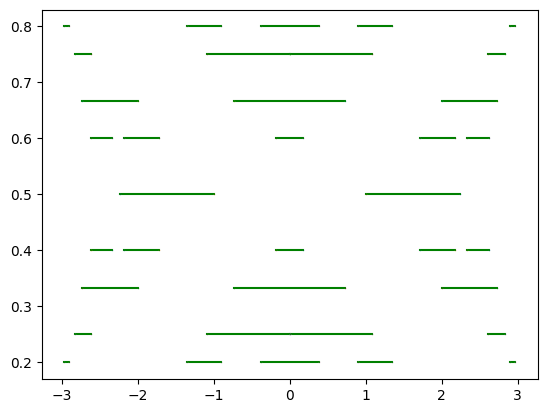

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm



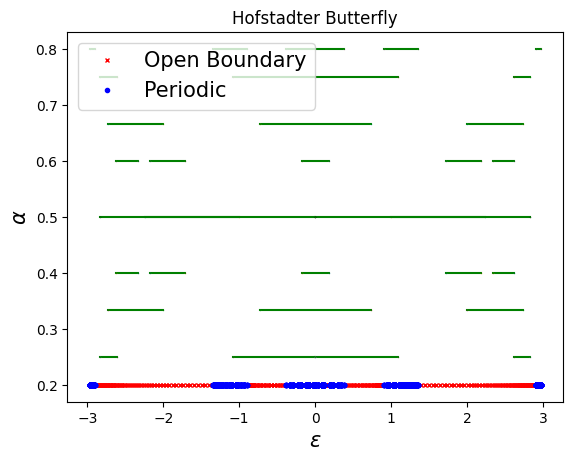

In [5]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig1, ax1 = plt.subplots()
q_max = 5
for p in range(1, q_max+1):
    for q in range(1, q_max+1):
        if q>p:
            if gcd(p, q) == 1:
                alfa = p/q
                y = np.zeros(q)
                y[:] = alfa
                
                x_1 = np.linalg.eigvalsh(HMatrix(alfa, k_x=0, k_y=0))
                x_2 = np.linalg.eigvalsh(HMatrix(alfa, k_x=np.pi/q,k_y=np.pi/q))

                for i in range(len(x_1)):
                    ax1.plot([x_1[i],x_2[i]], y[:2], '-', c='green', markersize=0.6)
  
                ax1.plot(x_1, y, 'o', x_2, y, 'o', markersize=0.1)
y2 = np.zeros(s)
y2[:] = alpha
x_3 = np.linalg.eigvalsh(HMatrix2(alpha, k_x=0, k_y=0))
x_4 = np.linalg.eigvalsh(HMatrix2(alpha, k_x=np.pi/s, k_y=np.pi/s))
for i in range(len(x_3)):
    ax1.plot([x_3[i],x_4[i]], y2[:2], '-', c='green', markersize=0.6)
ax1.plot(x_3, y2, 'o', c='black', markersize=0.1)
ax1.plot(x_4, y2, 'o', c='black', markersize=0.1)
        
plt.xlabel(r'$\epsilon$', fontsize=15)
plt.ylabel(r'$\alpha$', fontsize=15)
plt.title(r'$q=1-$'+str(q))         
#Compare momentum and real npace energies for Hofsadter 
y_real = np.zeros(L_x*L_y)
for i in range(L_x*L_y):
    y_real[i]=1/5
x_hard = np.linalg.eigvalsh(HardHMat(1/5,L_x,L_y))
x_per = np.linalg.eigvalsh(PerHMat(L_x,L_y,1/5))
ax1.plot(x_hard, y_real, 'rx', markersize=3, label="Open Boundary")
ax1.plot(x_per, y_real, 'bo', markersize=3, label="Periodic")
ax1.set_title("Hofstadter Butterfly")
ax1.legend(loc=2, prop={'size': 15}, scatterpoints=7)

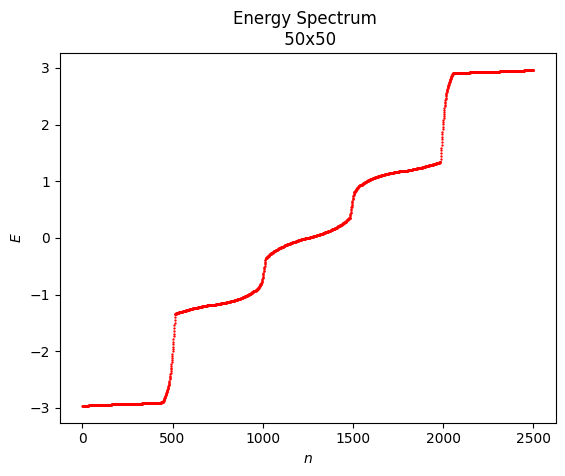

In [45]:
fig2, ax2 = plt.subplots()
eigenValues, eigenVectors = np.linalg.eig( (np.transpose(np.conjugate(HardHMat(1/5,L_x,L_y))) + HardHMat(1/5,L_x,L_y))/2)
idx = np.argsort(eigenValues)
sorted = eigenValues[idx]

x = np.arange(0, L_x*L_y, 1)
y = sorted
plt.xlabel(r'$n$')
plt.ylabel(r'$E$')
plt.title('Energy Spectrum \n '+str(L_x)+'x'+str(L_y))
ax2.plot(x, y, 'ro', markersize=0.7)

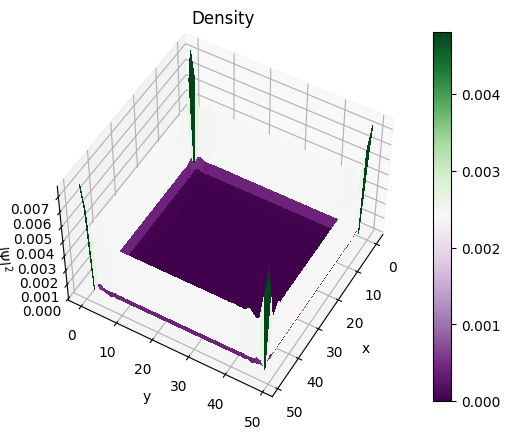

In [50]:
#eigenVectors[:,i] i'th eigen-vector
#eigenVectors[:,idx[600]]

nd = np.reshape((np.absolute(eigenVectors[:,idx[510]]))**2, (L_x,L_y))
lattice, arr, xy = lattice_2d(L_x,L_y)

X = xy[:,0][0:L_x]
Y = xy[:,0][0:L_x]
xv, yv = np.meshgrid(X, Y)
Z = nd
fig3, ax3 = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax3.plot_surface(xv, yv, Z, cmap=cm.PRGn, linewidth=0, antialiased=False)
plt.xlabel('x')
plt.ylabel('y')
ax3.set_zlabel(r'$|\Psi|^2$')
ax3.view_init(50,30)
ax3.set_title("Density")
plt.colorbar(surf)
#plt.savefig("fig1.svg",format='svg', dpi=1200)